Epoch [50/500], Loss: 15242.0117
Epoch [100/500], Loss: 10655.1377
Epoch [150/500], Loss: 5961.9761
Epoch [200/500], Loss: 4694.9614
Epoch [250/500], Loss: 4303.8413
Epoch [300/500], Loss: 3864.4927
Epoch [350/500], Loss: 3381.0891
Epoch [400/500], Loss: 2867.6870
Epoch [450/500], Loss: 2319.9775
Epoch [500/500], Loss: 1914.7046


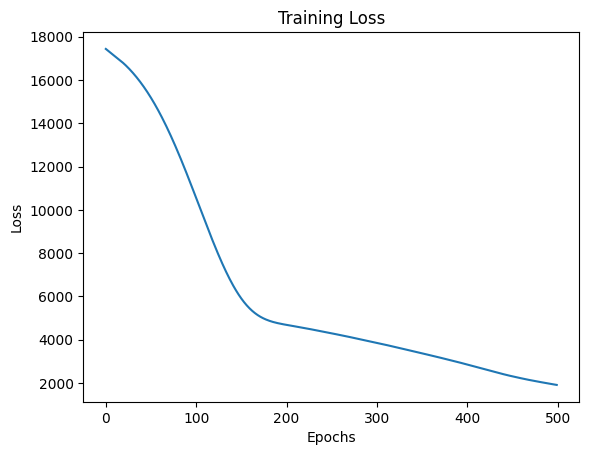

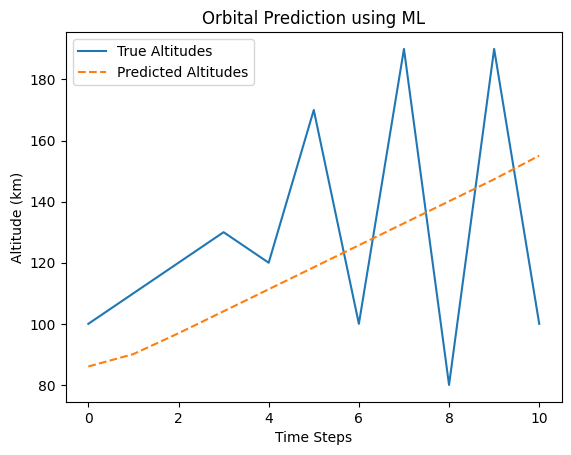

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Example altitude data (replace with your actual data)
altitudes = [100, 110, 120, 130, 120, 170, 100, 190, 80, 190, 100]

# Prepare training data
time_steps = len(altitudes)
X_train = torch.tensor(np.arange(time_steps).reshape(-1, 1), dtype=torch.float32)  # Time as feature
y_train = torch.tensor(altitudes, dtype=torch.float32)  # Altitude as target


# Define a simplified neural network for regression
class OrbitalPredictionNN(nn.Module):
    def __init__(self):
        super(OrbitalPredictionNN, self).__init__()
        self.layer1 = nn.Linear(1, 64)  # 64 hidden units
        self.layer2 = nn.Linear(64, 32)  # 32 hidden units
        self.layer3 = nn.Linear(32, 1)   # Single output for prediction

    def forward(self, x):
        x = torch.relu(self.layer1(x))   # ReLU activation
        x = torch.relu(self.layer2(x))   # ReLU activation
        x = self.layer3(x)               # Output layer
        return x

# Initialize model, loss function, and optimizer
model = OrbitalPredictionNN()
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate optimized

# Training loop
epochs = 500
losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero out previous gradients

    # Forward pass (prediction)
    predictions = model(X_train)  # Predicted altitudes

    # Compute loss
    loss = criterion(predictions, y_train)
    losses.append(loss.item())

    # Backward pass (compute gradients)
    loss.backward()
    optimizer.step()  # Update weights

    # Print progress every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot loss curve to visualize training progress
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Model evaluation and prediction
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = model(X_train)  # Get model predictions

# Plot true vs predicted altitudes
plt.plot(altitudes, label="True Altitudes")
plt.plot(predictions.numpy(), label="Predicted Altitudes", linestyle="--")
plt.xlabel("Time Steps")
plt.ylabel("Altitude (km)")
plt.title("Orbital Prediction using ML")
plt.legend()
plt.show()


